This code analyzes IBM data(IBM-Data-Clean.xlsx) and runs  
Lasso, Regression Tree and Random Forest models for the data

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter("ignore")  #Don't show warning messages

/Users/soumya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Open and read the excel using pandas

In [2]:
file_name="./IBM-Data-Clean.xlsx"
df=pd.read_excel(file_name)
print(df.shape)
# Created the dataframe having 
# 5 independent feature 
# YearsAtCompany,PerformanceRating,YearsWithCurrManager,YearsSinceLastPromotion,Age
# and one dependent feature
# PercentSalaryHike.
df_final = df[['YearsAtCompany','PerformanceRating','YearsWithCurrManager','YearsSinceLastPromotion','Age','PercentSalaryHike']]
print(df_final.shape)
print(df_final.head())

(1470, 31)
(1470, 6)
   YearsAtCompany  PerformanceRating  YearsWithCurrManager  \
0               6                  3                     5   
1              10                  4                     7   
2               0                  3                     0   
3               8                  3                     0   
4               2                  3                     2   

   YearsSinceLastPromotion  Age  PercentSalaryHike  
0                        0   41                 11  
1                        1   49                 23  
2                        0   37                 15  
3                        3   33                 11  
4                        2   27                 12  


Use functions provided by pandas to process the Assignment8-Q2-IBM-Data-Clean.xlsx data file
to 
- Get a subset of the data ready for numeric prediction. 
- From all the attributes available in the file, pick one numeric attribute to be the dependent variable (y), 
  and pick 5 (or more if you prefer) other reasonable numeric attributes as the independent variables (X).   
- The final data after processing should be stored in a variable whose type is DataFrame. 

In [3]:
# print all fields in the data frame along with the data type and identify out the field/dependent variable for Y and independent features(5 in total)
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [4]:
# EDA
# Fix any missing data issue.
df_final.isnull().sum()

YearsAtCompany             0
PerformanceRating          0
YearsWithCurrManager       0
YearsSinceLastPromotion    0
Age                        0
PercentSalaryHike          0
dtype: int64

There is no missing data based on the output of isnull().sum().

In [5]:
## Find the correlation between different features.
df_final.corr()


,YearsAtCompany,PerformanceRating,YearsWithCurrManager,YearsSinceLastPromotion,Age,PercentSalaryHike
YearsAtCompany,1.000000,0.003435,0.769212,0.618409,0.311309,-0.035991
PerformanceRating,0.003435,1.000000,0.022827,0.017896,0.001904,0.773550
YearsWithCurrManager,0.769212,0.022827,1.000000,0.510224,0.202089,-0.011985
YearsSinceLastPromotion,0.618409,0.017896,0.510224,1.000000,0.216513,-0.022154
Age,0.311309,0.001904,0.202089,0.216513,1.000000,0.003634
PercentSalaryHike,-0.035991,0.773550,-0.011985,-0.022154,0.003634,1.000000


Since PercentSalaryHike has a strong positive relationship with PerformanceRating (0.773550), we can conclude that if the performance rating is high it boosts the percentage of salary hike. 
Also PercentSalaryHike has minor negative relation with YearsSinceLastPromotion(-0.02215) , YearsAtCompany(-0.035991) and YearsWithCurrManager(-0.011985). From this we can conclude that there is a slight probability of getting a better hike when someone is new or have a new manager and promoted recently.

In [6]:
# Create data frames of dependent feature(df_dep) and independent features(df_indp).

df_dep = df_final[['PercentSalaryHike']]
df_indp = df_final[['YearsAtCompany','PerformanceRating','YearsWithCurrManager','YearsSinceLastPromotion','Age']]

print(df_indp.head(3))
print("\n########Dependent feature#########\n")
print(df_dep.head(3))

   YearsAtCompany  PerformanceRating  YearsWithCurrManager  \
0               6                  3                     5   
1              10                  4                     7   
2               0                  3                     0   

   YearsSinceLastPromotion  Age  
0                        0   41  
1                        1   49  
2                        0   37  

########Dependent feature#########

   PercentSalaryHike
0                 11
1                 23
2                 15


Split the data into Training (60%) and Testing (40%). 

In [7]:
# Split the data into Training (60%) and Testing (40%)




X_train, X_test, y_train, y_test = train_test_split(
   df_indp , df_dep, test_size=0.4, random_state=42
)

df_final.shape

(1470, 6)

In [8]:
X_train.shape

(882, 5)

In [9]:
X_test.shape

(588, 5)

Build Lasso, Regression Tree and Random Forest models for the data. Report RMSE and RRSE for these three models. In addition, use results from the correlation matrix, the coefficients from the Lasso linear regression model, and the feature importance generated by the Regression Tree model to discuss what you can learn from these results. For example, discuss which X variable has the strongest or steepest linear relationship with the y variable, etc.

### Lasso Linear Regression

In [10]:
model = Lasso()
lasso_model = GridSearchCV(model, param_grid={'alpha': [0,1]})
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_value = mean_squared_error(y_test, y_pred_lasso, squared=False) 
print("Lasso RMSE:", rmse_value)
print('Coefficients:',lasso_model.best_estimator_.coef_)
print('Intercept:',lasso_model.best_estimator_.intercept_)
print(X_train.columns)
#########Calculate RRSE##########
# Calculate the mean (average) of y
type(y_test)
y_avg_pd = y_test.mean()
# Extract the scalar value using the column name
y_avg = y_avg_pd['PercentSalaryHike']
#print(y_avg)
# Create a baseline model predicting the mean for every observation
y_pred_baseline = pd.Series(y_avg, index=y_test.index)
#print(y_pred_baseline)

# Calculate RMSE of the baseline model
rmse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)

# Calculate RRSE
rrse = (rmse_value / rmse_baseline)
print("Lasso RRSE:",rrse)

Lasso RMSE: 2.3781634904448414
Coefficients: [ 2.33941876e-02  7.87083690e+00 -2.85022095e-02 -4.47760813e-02
  2.92841716e-03]
Intercept: [-9.68764482]
Index(['YearsAtCompany', 'PerformanceRating', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'Age'],
      dtype='object')
Lasso RRSE: 0.6451162555438419


### Regression Tree

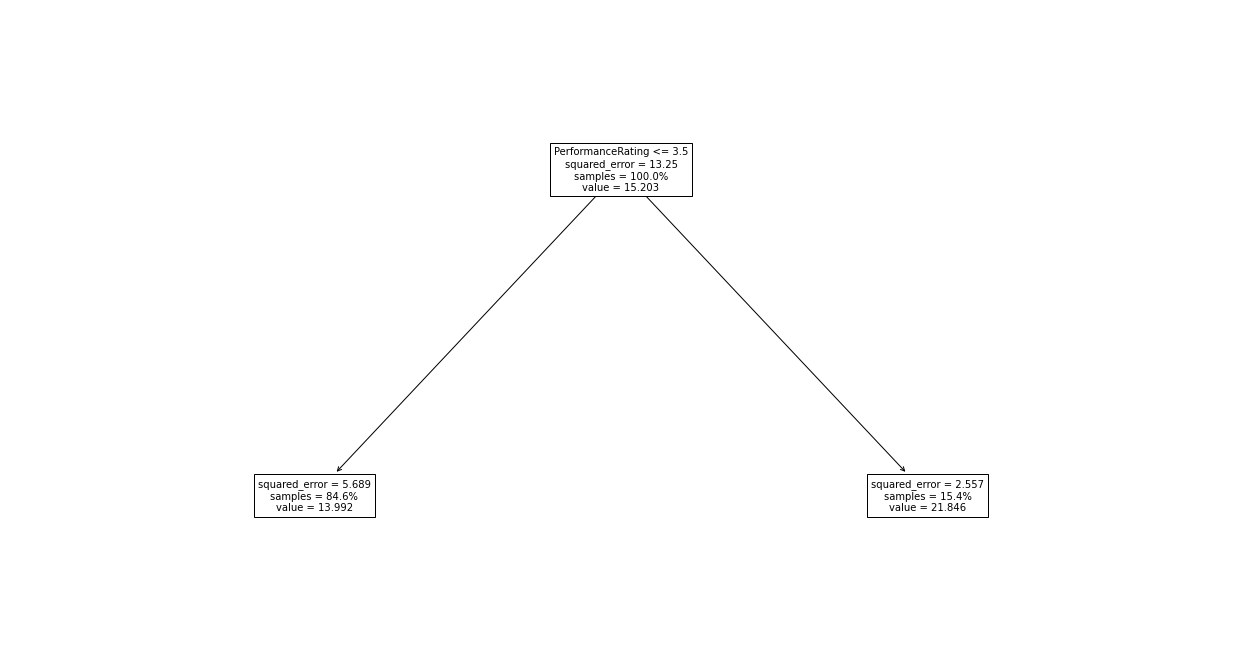

In [11]:
model = DecisionTreeRegressor()
Reg_Model = GridSearchCV(model, param_grid={"max_depth": [1,2,3,4,5,6,7,8,9]})
Reg_Model.fit(X_train, y_train)

plt.subplots(figsize=(22, 12)) 
plot_tree(Reg_Model.best_estimator_, max_depth=3, feature_names=X_train.columns.tolist(), proportion=True, fontsize=10) 
plt.show()

In [12]:
y_pred_regtree = Reg_Model.predict(X_test)
rmse_value = mean_squared_error(y_test, y_pred_regtree, squared=False) 
print("Regression Tree RMSE:", rmse_value)
print('Feature Importance:',Reg_Model.best_estimator_.feature_importances_)
print(X_train.columns)

#########Calculate RRSE##########
# Calculate the mean (average) of y
type(y_test)
y_avg_pd = y_test.mean()
# Extract the scalar value using the column name
y_avg = y_avg_pd['PercentSalaryHike']
#print(y_avg)
# Create a baseline model predicting the mean for every observation
y_pred_baseline = pd.Series(y_avg, index=y_test.index)
#print(y_pred_baseline)

# Calculate RMSE of the baseline model
rmse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)

# Calculate RRSE
rrse = (rmse_value / rmse_baseline)
print("Regression Tree RRSE:",rrse)

Regression Tree RMSE: 2.3730789710647313
Feature Importance: [0. 1. 0. 0. 0.]
Index(['YearsAtCompany', 'PerformanceRating', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'Age'],
      dtype='object')
Regression Tree RRSE: 0.64373699540596


### Random Forest 

In [13]:
model = RandomForestRegressor() 
randf_model = GridSearchCV(model, param_grid={"max_depth": [1,2,3,4,5,6,7,8,9]})
randf_model.fit(X_train, y_train)
y_pred_rf = randf_model.predict(X_test)
rmse_value = mean_squared_error(y_test, y_pred_rf, squared=False) 
print("Forest RMSE:", rmse_value )


best_rf_model = randf_model.best_estimator_
importances = best_rf_model.feature_importances_
print(X_train.columns, "\n",importances)

#########Calculate RRSE##########
# Calculate the mean (average) of y
y_avg_pd = y_test.mean()
# Extract the scalar value using the column name
y_avg = y_avg_pd['PercentSalaryHike']
#print(y_avg)
# Create a baseline model predicting the mean for every observation
y_pred_baseline = pd.Series(y_avg, index=y_test.index)
#print(y_pred_baseline)

# Calculate RMSE of the baseline model
rmse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)

# Calculate RRSE
rrse = (rmse_value / rmse_baseline)
print("Forest RRSE:",rrse)

Forest RMSE: 2.363177767809412
Index(['YearsAtCompany', 'PerformanceRating', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'Age'],
      dtype='object') 
 [0.00915503 0.98352933 0.00179787 0.00310867 0.0024091 ]
Forest RRSE: 0.6410511299492266


### Final Analysis
Based on the three training and tests we can conclude that the models created for all 3 are relatively strong model and should hold good since the value is more than 0.6.
Ananlysis of relationship -

For Lasso Linear Regression - - Salary Hike Percent has strongest relationship with PerformanceRating based on Coefficients of Linear Regression equation(7.87083690e+00).

For Regression Tree - Salary Hike Percent has strongest relationship with PerformanceRating based on feature importance.

For Random Forest - Salary Hike Percent has strongest relationship(based on importance - 0.98359438) with PerformanceRating.
